### Christie Gan
#### DATA 512
#### Date 12/15/20
#### Final Project

- Introduction
- Background or Related Work
- Research questions or hypotheses
- Methodology
- Findings
- Discussion (including Limitations and Implications)
- Conclusion
- References

#### Introduction and Motivation:
Given that so many people here in Puget Sound are a part of the tech industry or are interested in joining, I wanted to see how does working in the tech industry affect our mental health. The tech industry is known for being fast paced and harsh in the sense that it expects many deliverables and products on a yearly basis. Additonally, programming for many years can become taxing over time. I want to examine how working a tech job affects the mental health of different demographics. It would be beneficial to see how if affects different people as companies can work to improve mental health of their employees. Also, I'm very curious about the results, as I am also a part of the tech industry. I would like to learn whether a certain gender or country is affected more by mental health while working in a tech job. My main question is how does working in the tech industry affect employee's mental health based on different employee demographics?

#### Background/Related Work:
There is actually a lot of great articles and studies done previously examining how working in the tech industry affects mental health. In fact, I wouldn't be able to link them all because it's such a braod and popular topic. But none specifically looks at how mental health could be impacted differently for different types of tech employees. In most of previous articles, the general consensus was that working a fast paced, stressful tech job will lower mental health for everyone. It is almost assumed as a given in these articles. In [Let's Talk: It's Time to Get Serious About Mental Illness in Tech](https://www.iqmetrix.com/blog/lets-talk-its-time-to-get-serious-about-mental-illness-in-tech), the statistics show how founders of tech companies are 2X more likely to suffer depression, 6X more likely to have ADHD, and 3X more likely to have substance abuse. This are some alarming statistics. And it's not just founders, a lot of tech workers suffer in the same way.
Simiarily in another article, in [Mental Health Awareness Week - the tech industry crisis that organizations need to tackle](https://diginomica.com/mental-health-awareness-week-tech-industry-crisis-organizations-need-tackle) the article raises up the point that 2/3 of tech workers feel stressed and more than half will experience depression or anxiety at some point.

But what if we dug into deeper details, and took a look at which tech workers are most affected?
The only curiosity that I had, after reading all of these articles, was which demographic of tech workers are most affected in terms of mental health. I plan on examining gender and location as the defining demographic variables.

The data that I will be examining has come from [Open Sourcing Mental Illness](https://osmihelp.org/). They have already conducted a study back in 2014 and individually surveyed tech workers to gather this information. Luckily, they gathered some demographic data.

#### Research questions and/or hypotheses:

- Research question: How does working in the tech industry affect different demographics' mental health? 
- Hypothesis: I think older (>30) women's mental health from countries/states that have a small tech scene will be most negatively affected.

#### Data selected for analysis
My data is from Kaggle: https://www.kaggle.com/osmi/mental-health-in-tech-survey. I believe it is open source, as the author of the dataset is Open Sourcing Mental Illness, LTD. I want to use this because it is fairly comprehensive, has the columns that I need, and doesn't need too much manipulation. It also has some great key columns on demographics, such as age, gender, country, state, whether the employer is considered tech, work interference, benefits, and anonymity. I can group certain categories together and count how many people of a demographic has mental health that affects their work, whether they are willing to share it or not, etc. As the data was obtained through volunteers who completed the mental health survey, there isn' too many ethical concerns on the employees side, but there are some concerns with using the dataset that could affect the employer. Luckily, the employer's company name and supervisors are not shared in this dataset, but there are some columns that could potentially call out employers who have not been caring for mental health in the workplace.

The license is CC BY-SA 4.0.
Link to license: https://creativecommons.org/licenses/by-sa/4.0/
Public dataset

#### Methodology: 
I will probably break up the project into four parts.
I plan on starting off my analysis with data cleaning because some of the data isn't standardized (free form text left some spelling errors and different forms of writing). Then I would want to do some EDA, then work on statistical analysis, then create some data visualizations. 
I chose EDA because I think being able to extract the basic statistics would give the reader a good approximate counts of which employees are affected the most. Then I chose statistical analysis in order to verify and confirm the findings from EDA. Finally I think having data visualizations would help the reader to easily see the conclusion along with our findings.

#### Findings:

The raw data in this dataset is not standardized nor clean. Free form text leads to different spelling or typos that make it hard to group certain responses together, or categorical values make it hard to extract statistics. Additionally, there are some N/A values in this dataset. So, my first step is to clean the raw data so that the gender answers are grouped into male. female, and non-binary. Next I have to convert the categorical work_interfere column into numerical values, remove unrealistic ages (typos), and remove N/As. This reduces my dataset by 270 rows.

In [9]:
#data load and cleaning
import pandas as pd

mental_health = pd.read_csv('survey.csv')
print(mental_health.head())

#free-form text submission on Gender means we need to clean up this column and categorize 
#into Female, Male and Non-binary genders
print(mental_health.Gender.unique())
#dropped 'A little about you' and 'p' genders
mental_health.loc[mental_health['Gender'] == 'female', 'gender'] = 'Female' 
mental_health.loc[mental_health['Gender'] == 'Female', 'gender'] = 'Female' 
mental_health.loc[mental_health['Gender'] == 'Trans-female', 'gender'] = 'Female' 
mental_health.loc[mental_health['Gender'] == 'Cis Female', 'gender'] = 'Female' 
mental_health.loc[mental_health['Gender'] == 'F', 'gender'] = 'Female' 
mental_health.loc[mental_health['Gender'] == 'Woman', 'gender'] = 'Female' 
mental_health.loc[mental_health['Gender'] == 'f', 'gender'] = 'Female' 
mental_health.loc[mental_health['Gender'] == 'queer/she/they', 'gender'] = 'Female' 
mental_health.loc[mental_health['Gender'] == 'Femake', 'gender'] = 'Female' 
mental_health.loc[mental_health['Gender'] == 'woman', 'gender'] = 'Female' 
mental_health.loc[mental_health['Gender'] == 'Female ', 'gender'] = 'Female' 
mental_health.loc[mental_health['Gender'] == 'cis-female/femme', 'gender'] = 'Female' 
mental_health.loc[mental_health['Gender'] == 'Trans woman', 'gender'] = 'Female' 
mental_health.loc[mental_health['Gender'] == 'Female (trans)', 'gender'] = 'Female' 
mental_health.loc[mental_health['Gender'] == 'Female (cis)', 'gender'] = 'Female' 
mental_health.loc[mental_health['Gender'] == 'Femail', 'gender'] = 'Female' 

mental_health.loc[mental_health['Gender'] == 'M', 'gender'] = 'Male'
mental_health.loc[mental_health['Gender'] == 'Male', 'gender'] = 'Male' 
mental_health.loc[mental_health['Gender'] == 'male', 'gender'] = 'Male'
mental_health.loc[mental_health['Gender'] == 'Male-ish', 'gender'] = 'Male'
mental_health.loc[mental_health['Gender'] == 'm', 'gender'] = 'Male'
mental_health.loc[mental_health['Gender'] == 'something kinda male?', 'gender'] = 'Male'
mental_health.loc[mental_health['Gender'] == 'Cis Male', 'gender'] = 'Male'
mental_health.loc[mental_health['Gender'] == 'Mal', 'gender'] = 'Male'
mental_health.loc[mental_health['Gender'] == 'Male (CIS)', 'gender'] = 'Male'
mental_health.loc[mental_health['Gender'] == 'Make', 'gender'] = 'Male'
mental_health.loc[mental_health['Gender'] == 'Guy (-ish) ^_^', 'gender'] = 'Male'
mental_health.loc[mental_health['Gender'] == 'Male ', 'gender'] = 'Male'
mental_health.loc[mental_health['Gender'] == 'Man', 'gender'] = 'Male'
mental_health.loc[mental_health['Gender'] == 'msle', 'gender'] = 'Male'
mental_health.loc[mental_health['Gender'] == 'Mail', 'gender'] = 'Male'
mental_health.loc[mental_health['Gender'] == 'cis male', 'gender'] = 'Male'
mental_health.loc[mental_health['Gender'] == 'Malr', 'gender'] = 'Male'
mental_health.loc[mental_health['Gender'] == 'Cis Man', 'gender'] = 'Male'
mental_health.loc[mental_health['Gender'] == 'ostensibly male, unsure what that really means', 'gender'] = 'Male'

mental_health.loc[mental_health['Gender'] == 'Agender', 'gender'] = 'Non-binary' 
mental_health.loc[mental_health['Gender'] == 'All', 'gender'] = 'Non-binary' 
mental_health.loc[mental_health['Gender'] == 'Androgyne', 'gender'] = 'Non-binary' 
mental_health.loc[mental_health['Gender'] == 'Enby', 'gender'] = 'Non-binary' 
mental_health.loc[mental_health['Gender'] == 'non-binary', 'gender'] = 'Non-binary' 
mental_health.loc[mental_health['Gender'] == 'Nah', 'gender'] = 'Non-binary' 
mental_health.loc[mental_health['Gender'] == 'male leaning androgynous', 'gender'] = 'Non-binary' 
mental_health.loc[mental_health['Gender'] == 'Neuter', 'gender'] = 'Non-binary' 
mental_health.loc[mental_health['Gender'] == 'queer', 'gender'] = 'Non-binary' 
mental_health.loc[mental_health['Gender'] == 'fluid', 'gender'] = 'Non-binary' 
mental_health.loc[mental_health['Gender'] == 'Genderqueer', 'gender'] = 'Non-binary' 
mental_health.loc[mental_health['Gender'] == 'A little about you', 'gender'] = 'Non-binary' 
mental_health.loc[mental_health['Gender'] == 'p', 'gender'] = 'Non-binary' 


#change work_interfere column to numerical values for easier analysis
mental_health.loc[mental_health['work_interfere'] == 'Never', 'work_interfere_num'] = 0
mental_health.loc[mental_health['work_interfere'] == 'Rarely', 'work_interfere_num'] = 1
mental_health.loc[mental_health['work_interfere'] == 'Sometimes', 'work_interfere_num'] = 2
mental_health.loc[mental_health['work_interfere'] == 'Often', 'work_interfere_num'] = 3

#a few ages are outliers (typos), which will skew results. Need to remove these rows of data ????
mental_health = mental_health[mental_health.Age != 99999999999] 
mental_health = mental_health[mental_health.Age != -1726]
mental_health = mental_health[mental_health.Age != -1]
mental_health = mental_health[mental_health.Age != 329]

#narrow down to relevant features
mental_health = mental_health[['gender', 'Age', 'Country', 'work_interfere_num']].copy()

#create a no-N/A dataset
mental_health_no_na = mental_health.dropna()

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

Before doing any analysis, it's important to understand the dataset you are working with. In this case, I printed stats that I think would help me understand the resulting dataset. I calculated general stats for Age and work_interfere_num columns since those were numerical values. Next it was important to see total scores and counts of people in each demographic, and to calculate the total number of employees that answered a certain mental health score.

In [10]:
#data exploration
#print full output
pd.set_option('display.max_rows', None)

#view stats of quantitative data
print(mental_health_no_na.describe())

#view stats on demographics
print('Total Mental Health Score of each Gender:', mental_health_no_na.groupby(['gender']).sum()['work_interfere_num'])
print('Total Number of Females, Males and Non-binary Employees', mental_health_no_na.groupby(['gender']).count()['work_interfere_num'])
print('Mean Age of Employees:', mental_health['Age'].mean())
print('Total Mental Health Score of each Country:', mental_health.groupby(['Country']).sum()['work_interfere_num'])

#total number of employees in each demographic saying "yes" to a level of work interference  
print('Gender Counts:', mental_health_no_na.groupby(['gender', 'work_interfere_num']).size())
print('Age Counts:', mental_health_no_na.groupby(['Age', 'work_interfere_num']).size())
print('Country Counts:', mental_health_no_na.groupby(['Country', 'work_interfere_num']).size())

              Age  work_interfere_num
count  990.000000          990.000000
mean    32.280808            1.539394
std      7.438860            0.981097
min      8.000000            0.000000
25%     27.000000            1.000000
50%     31.500000            2.000000
75%     36.000000            2.000000
max     72.000000            3.000000
Total Mental Health Score of each Gender: gender
Female         372.0
Male          1132.0
Non-binary      20.0
Name: work_interfere_num, dtype: float64
Total Number of Females, Males and Non-binary Employees gender
Female        215
Male          764
Non-binary     11
Name: work_interfere_num, dtype: int64
Mean Age of Employees: 31.970517928286853
Total Mental Health Score of each Country: Country
Australia                  37.0
Austria                     2.0
Bahamas, The                3.0
Belgium                     6.0
Bosnia and Herzegovina      1.0
Brazil                      4.0
Bulgaria                    3.0
Canada                     98.0


For statistical analysis, I chose to use a t-test, one-way ANOVA test, and chi-squared test. I used the numerical mental health score to compare the responses from males and females in the t-test, and compare all three groups of gender (male, female, and non-binary). I used binary mental health scores to compare all three groups of gender in a chi-squared test. We find that in all three tests, the p-value is less than 0.05 and so gender is a statistically significant factor in determining mental health score.

In [11]:
#statistical analysis: gender
import math
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import chi2_contingency 

#t-test between male and female
gender = mental_health_no_na.groupby('gender')['work_interfere_num'].apply(list) 
print('T-Test:')
print(stats.ttest_ind([float(i) for i in gender['Female']], [float(i) for i in gender['Male']], equal_var=False))

#one-way anova test of gender, which includes female, male and non-binary
one_model = ols('work_interfere_num ~ gender', data=mental_health_no_na).fit()
one_anova_table = sm.stats.anova_lm(one_model)
print('ANOVA Test:')
print(one_anova_table)

#chi squared test of binary values true vs false of having mental illness
mental_health_no_na.loc[mental_health_no_na['work_interfere_num'] == 0, 'work_interfere_binary'] = 0
mental_health_no_na.loc[mental_health_no_na['work_interfere_num'] == 1, 'work_interfere_binary'] = 1
mental_health_no_na.loc[mental_health_no_na['work_interfere_num'] == 2, 'work_interfere_binary'] = 1
mental_health_no_na.loc[mental_health_no_na['work_interfere_num'] == 3, 'work_interfere_binary'] = 1

#https://www.geeksforgeeks.org/python-pearsons-chi-square-test/
#have to pip install scipy
print('Contingency Table:')
print(pd.crosstab(index=mental_health_no_na['gender'], columns=mental_health_no_na['work_interfere_binary']))
data = [[24, 191], [187, 577], [1, 10]] 
stat, p, dof, expected = chi2_contingency(data) 

print('chi-squared statistic:', stat)
print('p-value:', p)

T-Test:
Ttest_indResult(statistic=3.567502198748486, pvalue=0.0004053049082669763)
ANOVA Test:
             df      sum_sq   mean_sq         F    PR(>F)
gender      2.0   11.230329  5.615164  5.891327  0.002861
Residual  987.0  940.733308  0.953124       NaN       NaN
Contingency Table:
work_interfere_binary  0.0  1.0
gender                         
Female                  24  191
Male                   187  577
Non-binary               1   10
chi-squared statistic: 18.676316471358774
p-value: 8.80013646975696e-05


C:\Users\ganch\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ganch\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


For age, since both dependent and independent variables are qualitative, I simply calculated the correlation coefficient to see if there was a linear relationship between the two variables. The coefficient turned out to be -0.05. Since it is a very small value, there is an extremely weak correlation between age and mental health.

In [12]:
#statistical analysis: age
#correlation
#https://realpython.com/numpy-scipy-pandas-correlation-python/
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

r = np.corrcoef(mental_health_no_na['Age'], mental_health_no_na['work_interfere_num'])
print(r)

[[ 1.         -0.04543546]
 [-0.04543546  1.        ]]


I calculated the percentage of people affected by mental health issues in each country. Put simply, I took the sum of the binary values of mental health and divided it over the total number of respondents in that country. Of course, the data is biased here. There is vastly different number of respondents in each country, and there are many countries that only have one respondent, which can lead to a percentage of 0% or 100%. However, if we look at the percentages of countries that have more than 20 respondents, Germany has the highest percentage of employee respondents whose mental health is affected by the tech industry.

In [13]:
#statistical analysis
#percentage of mentally ill per country
total_by_country = mental_health_no_na.groupby(['Country']).count()['work_interfere_binary']

mental_by_country = mental_health_no_na.groupby(['Country']).sum()['work_interfere_binary']

mental_health_by_country = round(mental_by_country / total_by_country * 100, 2)
print(mental_health_by_country)

Country
Australia                  85.00
Austria                   100.00
Bahamas, The              100.00
Belgium                    75.00
Bosnia and Herzegovina    100.00
Brazil                     75.00
Bulgaria                   66.67
Canada                     74.60
China                     100.00
Colombia                  100.00
Croatia                   100.00
Czech Republic            100.00
Denmark                   100.00
Finland                    50.00
France                     50.00
Georgia                   100.00
Germany                    87.88
Hungary                   100.00
India                      80.00
Ireland                    73.91
Israel                     33.33
Italy                      50.00
Japan                     100.00
Mexico                     50.00
Moldova                   100.00
Netherlands                73.68
New Zealand                87.50
Philippines               100.00
Poland                     85.71
Portugal                    0.00
Ru

I wanted to consider the effect of all three variables together on the mental health score. Using an ANOVA test, I put in all three variables together in relation to work_interfere_num. As expected, the p-value for gender is statistically significant, while the p-values for country and age are not.

In [14]:
#statistical analysis
#https://www.statology.org/two-way-anova-python/
#two-way anova of all three features

two_model = ols('work_interfere_num ~ gender + Age + Country', data=mental_health_no_na).fit()
sm.stats.anova_lm(two_model, typ=2)

sum_sq     df         F    PR(>F)
gender     10.065892    2.0  5.274779  0.005270
Country    35.127506   38.0  0.968826  0.524872
Age         1.037662    1.0  1.087522  0.297287
Residual  904.536957  948.0       NaN       NaN

For the data visualizations, I chose to graph statistics that would best visually compare between groups in an independent variable. Here, we have a graph of average mental health score for each gender, two graphs to compare the plots and means of ages vs. mental health score, and a graph of percentages of how much of the respondents' mental health is negatively affected by country. The visuals are much easier to interpret than statistical analysis by itself.

Average Mental Health Score by Gender: gender
Female        1.730233
Male          1.481675
Non-binary    1.818182
Name: work_interfere_num, dtype: float64


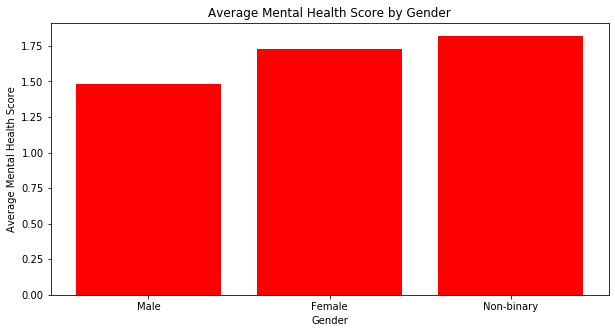

In [15]:
#data visualizations

#gender
print('Average Mental Health Score by Gender:', 
      mental_health_no_na.groupby(['gender']).sum()['work_interfere_num'] / 
      mental_health_no_na.groupby(['gender']).count()['work_interfere_num'])

graph_gender = [['Male', 1.48], ['Female', 1.73], ['Non-binary', 1.82]]
graph_gender = pd.DataFrame(graph_gender, columns = ['Gender', 'Score']) 

plt.figure(figsize=(10, 5))
plt.bar(graph_gender['Gender'], graph_gender['Score'], color='red')

plt.xlabel("Gender")
plt.ylabel("Average Mental Health Score")
plt.title("Average Mental Health Score by Gender")

plt.show()

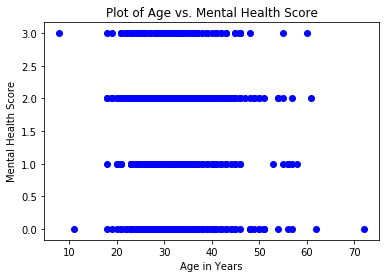

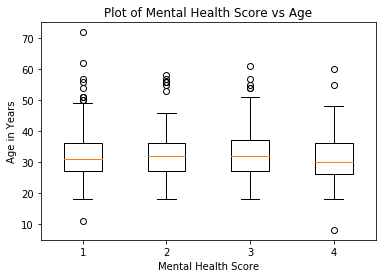

In [16]:
#age
import matplotlib.pyplot as plot

#plotting the raw data in a scatterplot
plt.scatter(mental_health_no_na['Age'], mental_health_no_na['work_interfere_num'], color='blue')
plt.xlabel("Age in Years")
plt.ylabel("Mental Health Score")
plt.title("Plot of Age vs. Mental Health Score")
plt.show()

#plotting the mean, quartles, min, max and outliers in a box and whisker chart
zero_group = mental_health_no_na.loc[mental_health_no_na['work_interfere_num'] == 0]['Age']
one_group = mental_health_no_na.loc[mental_health_no_na['work_interfere_num'] == 1]['Age']
two_group = mental_health_no_na.loc[mental_health_no_na['work_interfere_num'] == 2]['Age']
three_group = mental_health_no_na.loc[mental_health_no_na['work_interfere_num'] == 3]['Age']

plot.boxplot((zero_group, one_group, two_group, three_group))
plot.xlabel("Mental Health Score")
plot.ylabel("Age in Years")
plot.title("Plot of Mental Health Score vs Age")
plot.show()

Country
Australia                  20
Austria                     1
Bahamas, The                1
Belgium                     4
Bosnia and Herzegovina      1
Brazil                      4
Bulgaria                    3
Canada                     63
China                       1
Colombia                    2
Croatia                     2
Czech Republic              1
Denmark                     2
Finland                     2
France                      4
Georgia                     1
Germany                    33
Hungary                     1
India                       5
Ireland                    23
Israel                      3
Italy                       6
Japan                       1
Mexico                      2
Moldova                     1
Netherlands                19
New Zealand                 8
Philippines                 1
Poland                      7
Portugal                    1
Russia                      2
Singapore                   4
Slovenia                    1
So

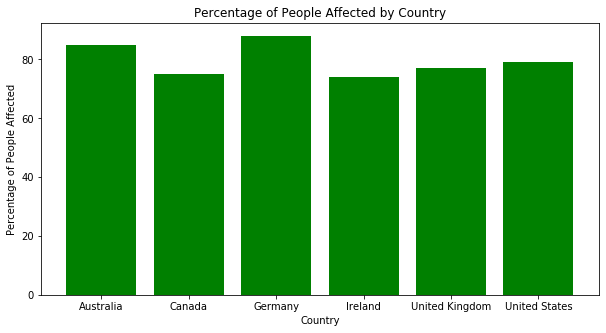

In [17]:
#countries
#check for countries with higher than 20 responses
print(mental_health_no_na.groupby(['Country']).count()['work_interfere_binary'])

graph_country = [['Australia', 85], ['Canada', 75], ['Germany', 88], ['Ireland', 74], ['United Kingdom', 77], ['United States', 79]]
graph_country = pd.DataFrame(graph_country, columns = ['Country', 'Percentage of People Affected']) 
print(graph_country)
plt.figure(figsize=(10, 5))
plt.bar(graph_country['Country'], graph_country['Percentage of People Affected'], color='green')

plt.xlabel("Country")
plt.ylabel("Percentage of People Affected")
plt.title("Percentage of People Affected by Country")

plt.show()

#### Discussion:

Discussion of Results

- Based on the statistical analysis, we find that non-binary employees have an average mental health score of 1.82, males have an average of 1.48, and females have an average of 1.73 when they are working in the tech industry. We can see based on these scores that non-binary employees tend to be more severely affected, and men tend to be least affected. Based on the p-value on gender, this is a statistically significant factor in affecting mental health. Otherwise, age and country does not have significant p-values and therefore aren't demographics to really consider when talking about mental health. I was very surprised to learn that age and location did not affect mental health significantly! I would imagine being older would have more stressers, or that some countries have much tougher work cultures. However, I see now that either these were mistakenly assumed, or my dataset is not large enough to make that determination.

Unknowns and dependencies

- I kept the scope of the project to just examining which demographics are more heavily impacted by mental health. If I widen the scope to how are tech companies working to fix mental health issues in their workplace, then that would be tougher question and involve more columns of data. So I would have to perform extra EDA and work with the data more before I commit to widening the scope. I ended up using just this daataset.

- Thinking on dependencies, I don't think I have a dependency on any other dataset. However, this brings the concern on if I widen the scope, and need more columns of data, it would be very difficult to find another dataset to append to this one as there are no similar identifying keys/unique IDs. As of now, I don't anticipate using another dataset but if I need to later on, it would be difficult to join it with this dataset. However, I could always use the datasets separately and that would resolve the issue. These would be good points to think about in the future.

Limitations

- Most of the limitations of this project came from the dataset. Some of the data was in free-form text, meaning the survey responders could type in their answer. An example of this is gender. I had to do a lot of cleaning to reorganize the data into three distinguishable buckets. Another limitation of the dataset is that there were only four scores/categories where mental health effect is recorded: never, rarely, sometimes, often. I think the analysis would be more accurate and comprehensive if more categories existed for this variable. The dataset is also fairly small. 1,200 rows to start off is good, but after cleaning and dropping NA values, the dataset dropped to around 990 rows. More rows of data could lead to higher accuracy in the statistical analysis. And combined with the fact that the countries nor genders don't have an even number of responders make it harder to compare results across more countries. Additionally, because the responders come from all over the world, it is quite possible that different nationalities consider level of mental health differently. For the sake of this project, we are operating under the assumption that everyone does have the same definition of mental health.

Implications 

- The implications of this project is that we now have identified certain demographics that tend to have higher scores or percentages of people whose mental health is affected by their jobs. Based on these findings, we can assume (not stereotype!) that in general, non-binary employees will be most affected by working in the tech field. This implies that they may face more discrimintation or marginalization in the workforce. They may be uncomfortable in the ways coworkers act around them, or companies are not supporting these employees enough to keep their mental health score lower along with the other employees. This is important for companies to know so that they provide the necessary support and guidance for non-binary employees in particular, and to be mindful of what they may face differently in the workforce compared to others. Of course, it is suggested that all employees get mental health support under stress, but companies should be more careful, or maybe be more catered in the way they support non-binary and female employees. Age seems to have very little effect on mental health surprisingly, so there is not much implications here. As for countries, it is simply informative to know that Germany tends to have a slightly higher percentage of workers who feel negatively affected by working in the tech industry. This can imply that they may have a culture of strict standards at work which can increase stress. It is an interesting finding to see which countries can improve their companies' culture to be more accomodating to people's mental health.

##### Conclusion:

By the end of the analysis, we can conclude that gender does have a statistically significant effect on mental health, while age and location (country) does not. In general, non-binary employees are more severely impacted, and tend to have a worse mental health score, at an average of 1.82. This is approximately the equivalent of many non-binary employees responding "Sometimes" to having such severe mental health issues that their work is affected. Companies should adapt their mental support policies to accomodate for this demographic, who may feel marginalized in the workplace.

##### References:

Everett, Cath. “Mental Health Awareness Week - the Tech Industry Crisis That Organizations Need to Tackle.” Diginomica, Diginomica, 26 June 2019, diginomica.com/mental-health-awareness-week-tech-industry-crisis-organizations-need-tackle. 

Barkved, Kirsten. “Let's Talk: It's Time to Get Serious About Mental Illness in Tech.” IQmetrix, IQmetrix, 28 Jan. 2020, www.iqmetrix.com/blog/lets-talk-its-time-to-get-serious-about-mental-illness-in-tech. 

“Open Sourcing Mental Illness - Changing How We Talk about Mental Health in the Tech Community - Stronger Than Fear.” OSMI Home, Open Sourcing Mental Illness Ltd, osmihelp.org/. 

Open Sourcing Mental Illness, LTD. “Mental Health in Tech Survey.” Kaggle, Kaggle, 3 Nov. 2016, www.kaggle.com/osmi/mental-health-in-tech-survey. 